In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score
from google.colab import files

In [12]:
# 2. Upload dataset
uploaded = files.upload()

Saving heart_disease.csv to heart_disease (1).csv


In [13]:
df = pd.read_csv("heart_disease.csv")

print("✅ Dataset Preview:")
print(df.head())
print("\n📊 Dataset Info:")
print(df.info())

# Features (X) and Target (y)
X = df.drop("num", axis=1)
y = (df["num"] > 0).astype(int)   # 0 = no disease, 1 = disease present

✅ Dataset Preview:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal       num  
0  0.017197 -0.696631  1.087338  2.274579 -0.711131  0.660004 -0.764198  
1 -1.821905  1.435481  0.397182  0.649113  2.504881 -0.890238  0.866450  
2 -0.902354  1.435481  1.346147  0.649113  1.432877  1.176752  0.051126  
3  1.637359 -0.696631  2.122573  2.274579 -0.711131 -0.890238 -0.764198  
4  0.980537 -0.696631  0.310912 -0.976352 -0.711131 -0.890238 -0.764198  

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 3

In [14]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Dataset scaled")

✅ Dataset scaled


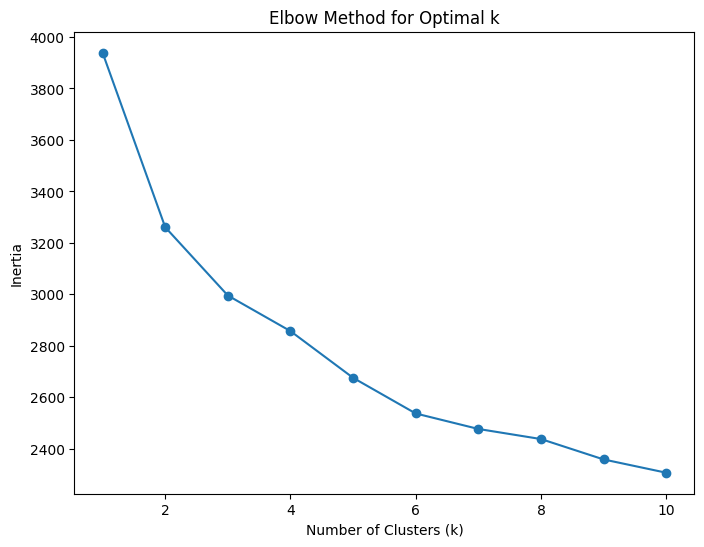

In [22]:
# Elbow method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [24]:
# Choose K from elbow (example: 2, adjust based on plot)
k_opt = 2

kmeans = KMeans(n_clusters=k_opt, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

print(f"✅ K-Means clustering applied with k={k_opt}")

✅ K-Means clustering applied with k=2


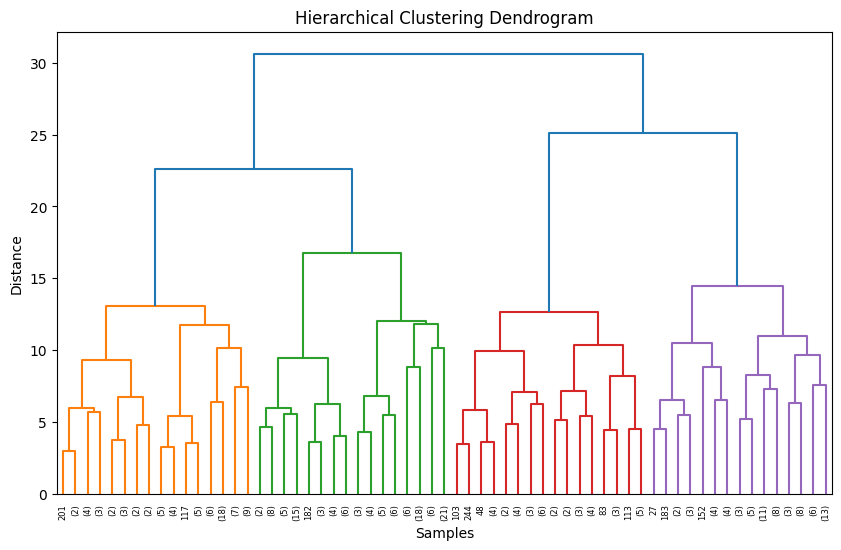

✅ Hierarchical clustering applied with k=2


In [25]:
# Dendrogram
plt.figure(figsize=(10, 6))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [26]:
# Apply Agglomerative Clustering with same k as elbow
agg = AgglomerativeClustering(n_clusters=k_opt)
agg_labels = agg.fit_predict(X_scaled)

print(f"✅ Hierarchical clustering applied with k={k_opt}")

✅ Hierarchical clustering applied with k=2


In [27]:
ari_kmeans = adjusted_rand_score(y, kmeans_labels)
ari_agg = adjusted_rand_score(y, agg_labels)

print(f"🔹 Adjusted Rand Index (K-Means): {ari_kmeans:.3f}")
print(f"🔹 Adjusted Rand Index (Hierarchical): {ari_agg:.3f}")

print("\nConfusion Matrix - KMeans:")
print(confusion_matrix(y, kmeans_labels))

print("\nConfusion Matrix - Hierarchical:")
print(confusion_matrix(y, agg_labels))

🔹 Adjusted Rand Index (K-Means): 0.429
🔹 Adjusted Rand Index (Hierarchical): 0.146

Confusion Matrix - KMeans:
[[ 13 151]
 [100  39]]

Confusion Matrix - Hierarchical:
[[ 35 129]
 [ 81  58]]


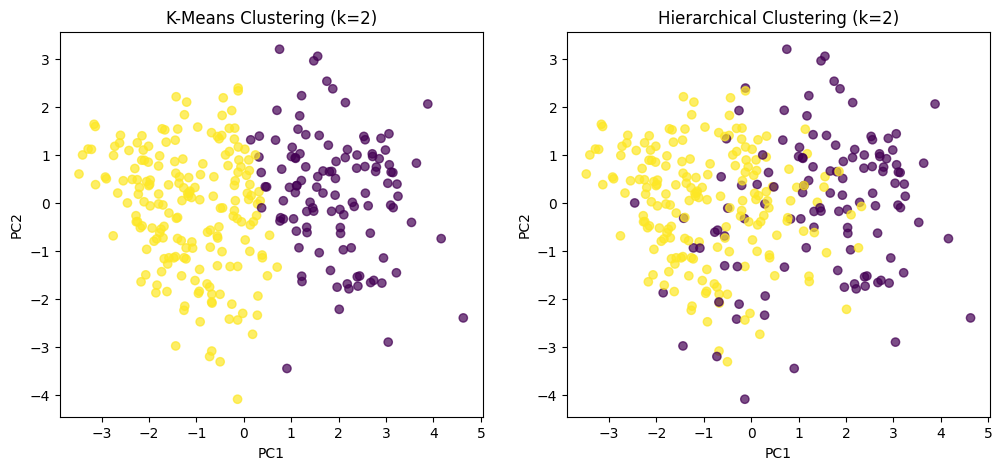

In [28]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,5))

# K-Means
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title(f"K-Means Clustering (k={k_opt})")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Hierarchical
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=agg_labels, cmap='viridis', alpha=0.7)
plt.title(f"Hierarchical Clustering (k={k_opt})")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()